<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## Curve Fitting
### About this notebook

In this worksheet we use the `scipy.optimize.curve_fit` function to fit a curve to experimental data points.

---

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

First, we define the function that will be used for the fit. In this case, the function depends on the independent variable $x$ and on the parameters $a$, $b$ and $c$.

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

We will generate 50 synthetic data points $(x,y)$ using the function and a random noise to introduce uncertainties,

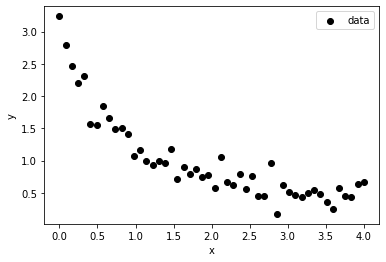

In [3]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.scatter(xdata, ydata, marker='o', color='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The `curve_fit` function receives as arguments the functio and the collection of data points stored in the arrays `xdata`and `ydata`. It returns two objects:

`popt` : Array with the optimal values for the parameters so that the sum of the squared residuals of `f(xdata, *popt) - ydat` is minimized.

`pcov`: 2 dimensional array with the estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use `perr = np.sqrt(np.diag(pcov)`.



In [7]:
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov

(array([2.50292578, 1.26917218, 0.49621196]),
 array([[ 0.00976057,  0.00382351, -0.00057088],
        [ 0.00382351,  0.01217786,  0.00369086],
        [-0.00057088,  0.00369086,  0.00203336]]))

In [9]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.09879562, 0.11035334, 0.04509279])

We can visualize the data points together with the fit:

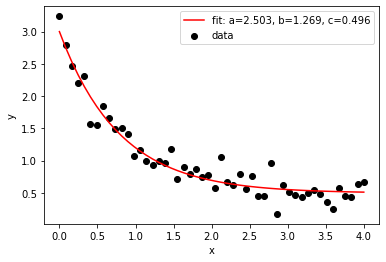

In [5]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(xdata, ydata, marker='o', color='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It is also possible to constrain the values of the parameters for the optimization. For example, we can restrict the values to the region where
\begin{align}
0 \leq a &\leq 3\\ 
0 \leq b &\leq 1 \\
0 \leq c &\leq 0.5
\end{align}

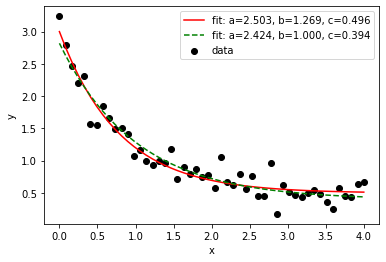

In [6]:
popt1, pcov1 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt1), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))
plt.scatter(xdata, ydata, marker='o', color='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

There can be many extensions dentoed by `hdul[0]`, `hdul[1]`, etc. The first one, `hdul[0]`, is called the PRIMARY extension. There is also another type of information as the number of cards and the dimensions of the data table.  

Since we open the file to extract and assign the information, it is recommendable to close the file: